### steps to take
step 1: get the data <br>
step 2: get dummies and change all the categorical variable to intigers<br>
step 3: train_test_split the data<br> 
step 4: standard scaling<br>
step 5: logistic regression<br>
step 6: 

As a Mod4 project, we are performing logistic regression. **Logistic Regression** is a predictive Machine Learning classification algorithm that explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

# how to deal data imbalance? 

## Step 1: Import all the necessory python packages

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns 
# sns.set(style='white')
# sns.set(style='whitegrid', color_codes=True)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix#, classifiction_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# autoreload 
%load_ext autoreload
%autoreload 2
import data_cleaning

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 2: Get the data

The dataset is taken from the UCI [Machine Learning repository](http://archive.ics.uci.edu/ml/index.php). The dataset is on direct phone calls marketing campaigns of a Portuguese banking institution. This classification project is to predict if the client will subscribe ('YES') or not ('NO') to a cash investment for an agreed rate of interest over **a fixed** amount of time, or **term**. 

The dataset contains 41,188 records and 21 features. 

In [26]:
import pandas as pd
bank = pd.read_csv('data/bank-additional-full.csv', sep=';')
print(bank.shape)
bank.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


cleaning data ready for Machine Learining

In [27]:
import data_cleaning
bank_clean = data_cleaning.cleaned_data(bank)
print(bank_clean.shape)
bank_clean.head()

There were 12 duplicates and they have been removed
(41176, 16)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,target
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,0
3,40,admin.,married,basic,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,0


### Input variables
1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
6. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
7. contact: contact communication type (categorical: “cellular”, “telephone”)
8. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
9. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
10. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
11. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
12. previous: number of contacts performed before this campaign and for this client (numeric)
13. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)

#### Predict variable (desired target):
target — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)


## Data exploration

0    0.887337
1    0.112663
Name: target, dtype: float64


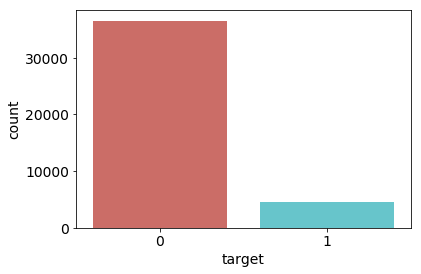

In [28]:
print(bank_clean['target'].value_counts(normalize=True))
sns.countplot(x='target', data=bank_clean, palette='hls', )
plt.show()
# plt.savefig('count_plot')

classes are imbalanced. Percentage of non subscription is at 89% while percentage of subscription is only 11%. we should do class balancing first. 

Text(0, 0.5, 'Frequency of Purchase')

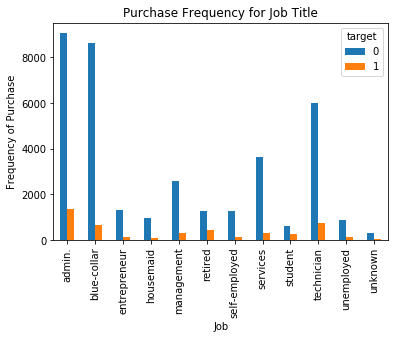

In [29]:
%matplotlib inline
pd.crosstab(bank_clean.job,bank_clean.target).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
# plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

what about marital status?

Text(0, 0.5, 'Proportion of Customers')

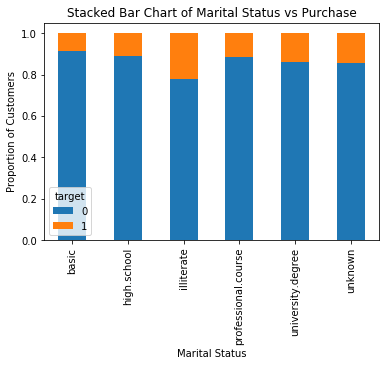

In [30]:
table=pd.crosstab(bank_clean.education,bank_clean.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
# plt.savefig('mariral_vs_pur_stack')

Education seems a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency')

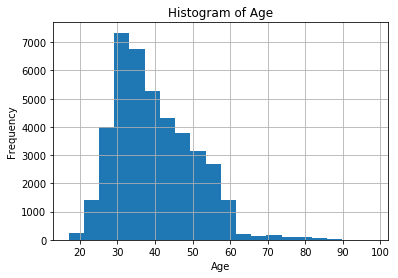

In [31]:
# age distirbution
bank_clean.age.hist(bins=20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.savefig('hist_age')

Most customers in this dataset are in the age range of 30 to 40.

## Step 3: Get_dummies

In [32]:
bank_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

In [33]:
X = bank_clean.drop('target', axis = 1)
y = bank_clean['target']
X_dum = pd.get_dummies(X, 
               columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], 
               drop_first= True)

In [34]:
X_dum.head()
print(X_dum.shape)
print(X_dum.columns)
X_dum.head()

(41176, 45)
Index(['age', 'default', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


,age,default,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,no,261,1,999,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,57,unknown,149,1,999,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,no,226,1,999,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,no,151,1,999,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,no,307,1,999,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


### StandardScaler

In [35]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dummed_train)
bank_train = scaler.transform(dummed_train)
pd.DataFrame(bank_train).shape
## then used 
# scaler.transform(X_test)

NameError: name 'dummed_train' is not defined

## Step 3: Train-test split the data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state = 0, stratify= y, test_size = .2)
print('Train and test datas are splited at 80% to 20% ')
X_train.head()

Train and test datas are splited at 80% to 20% 


,age,default,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
29109,37,no,171,1,999,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14436,33,no,110,2,999,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
40268,33,no,5,1,999,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
10249,38,no,100,3,999,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
15770,41,no,521,1,999,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [37]:
# check the shape of our training data 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Number of yes', len(y_train == 1))
print('Number of no', len(y_train == 0))
y_train.value_counts(normalize=True)

X_train: (32940, 45)
y_train: (32940,)
Number of yes 32940
Number of no 32940


0    0.887341
1    0.112659
Name: target, dtype: float64

### Dealing over-sampling using SMOTE 

we need to up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Techique).
Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
We are going to implement SMOTE in Python.

In [38]:
# dealing with over-sampling using SMOTE 
from imblearn.over_sampling import SMOTE 

columns = X_train.columns

os = SMOTE(random_state=0)
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.Series(os_data_y)

# check numbers
print('Length of oversampled data is', len(os_data_X))
print('Number of no subscription in oversampled data', np.sum(os_data_y==0))
print('Number of subscription', np.sum(os_data_y==1))
print('Proportion of no subscription data in oversampled data is', np.sum(os_data_y==0)/len(os_data_y))
print('Proportion of subscription data in oversampled data is', np.sum(os_data_y==1)/len(os_data_y))

ValueError: could not convert string to float: 'no'

In [39]:
# after using Synthetic Minority Oversampling Techique
print(os_data_X.shape)
print(len(os_data_y))
os_data_y.value_counts(normalize=True)

NameError: name 'os_data_X' is not defined

In [40]:
# calculate for age
mu, std = X_train.age.mean(), dummed_train.age.std()
print('mean age', mu, 'age std', std)
print('Standardized value for the first row is:', (dummed_train.age[1233]-mu)/std)
print(dummed_train.age[1233])
dummed_train.head()

NameError: name 'dummed_train' is not defined

get read of default , housing

### logreg

In [41]:
## Let's go with the vanilla case - no regularization
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

ValueError: could not convert string to float: 'no'

In [3]:
type(X_train)

NameError: name 'X_train' is not defined

In [42]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train).fit()
# result=logit_model.fit()
print(logit_model.summary2())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [55]:
new_features = ['age', 'campaign', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 
        'marital_married', 'marital_single',
       'education_high.school',
       'education_professional.course', 'education_university.degree', 
       'housing_yes',
       'contact_telephone', 'month_spring', 'month_summer',
       'month_winter', 'day_of_week_mon', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']
print(len(new_features))
X_train_new = X_train[new_features]
# X_train_new.head()
logit_model=sm.Logit(y_train,X_train_new).fit()
# result=logit_model.fit()
print(logit_model.summary2())

26
Optimization terminated successfully.
         Current function value: 0.309082
         Iterations 7
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.122     
Dependent Variable:      target               AIC:                  20414.3313
Date:                    2019-10-21 00:22     BIC:                  20632.7948
No. Observations:        32940                Log-Likelihood:       -10181.   
Df Model:                25                   LL-Null:              -11596.   
Df Residuals:            32914                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          7.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------

In [ ]:
# from sklearn import preprocessing
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_transformed = scaler.transform(X_train)
# clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
# X_test_transformed = scaler.transform(X_test)
# clf.score(X_test_transformed, y_test)  